From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [28]:
import numpy as np
import pandas as pd

from IPython.display import display
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib.pyplot as plt

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

in_file_test = 'test.csv'
full_data_test = pd.read_csv(in_file_test)

def normalizar(train, test):
    train = train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'Survived'], axis = 1)
    test = test.drop(['Name', 'Cabin', 'Fare', 'Ticket'], axis = 1)
    
    result = train.append(test)
    result['Age'].fillna(int(result['Age'].mean()), inplace=True)
    #result['Embarked'].fillna(result['Embarked'].mode()[0], inplace=True)
    #result['Cabin'].fillna(result['Cabin'].mode()[0], inplace=True)
    
    result['Sex'] = result['Sex'].astype('category').cat.codes
    result['Embarked'] = result['Embarked'].astype('category').cat.codes
    #result['Cabin'] = result['Cabin'].astype('category').cat.codes
    
    train = result[:len(train)]
    test = result[len(train):]
    return train, test

'''
Normalização das idades que contem NaN.
Calculo a média das idade dos que sobreviveram e não, separadamente. 
Para os passageiros que não contém a idade, inserir a média das idades
de acordo se o passageiro tenha sobrevivido ou não.
Isso apenas para o caso de treinamento.
def normalizar2(train, test):
    without_nan_age = train[train['Age'] > 0]        
    average_age_survided = without_nan_age[without_nan_age['Survived'] == 1]['Age'].mean()
    average_age_not_survided = without_nan_age[without_nan_age['Survived'] == 0]['Age'].mean()    

    ite = 0
    for i, passageiro in train.iterrows():        
        if passageiro[4] > 0: ite = ite + 1
        elif passageiro[1] == 1: passageiro[4] = int(average_age_survided)
        else: passageiro[4] = int(average_age_not_survided)
            
    train = train.drop(['Cabin', 'Name', 'Ticket', 'Fare', 'Survived'], axis = 1)
    test = test.drop(['Cabin', 'Name', 'Ticket', 'Fare'], axis = 1)
    
    result = train.append(test)    
    result['Age'].fillna(int(result['Age'].mean()), inplace=True)
    result['Sex'] = result['Sex'].astype('category').cat.codes
    result['Embarked'] = result['Embarked'].astype('category').cat.codes
    
    train = result[:len(train)]
    test = result[len(train):]  
    return train, test
'''

def executar(model, train):
    X = train.drop(['PassengerId'], axis = 1)
    y = full_data['Survived']
    tamTrain = int(len(X)*0.8)
    model.fit(X[:tamTrain], y[:tamTrain])
    pred = model.predict(X[tamTrain:])
    return accuracy_score(pred, y[tamTrain:])

In [29]:
train, test = normalizar(full_data, full_data_test)

In [30]:
modelDT = tree.DecisionTreeClassifier(random_state = 1)
executar(modelDT, train)

0.83240223463687146

In [31]:
modelGB = GradientBoostingClassifier(random_state=1)
executar(modelGB, train)
#train.columns

0.86033519553072624

In [32]:
modelLR = LogisticRegression(random_state=1)
executar(modelLR, train)

0.82681564245810057

In [33]:
modelGB.feature_importances_

array([ 0.0842561 ,  0.17340511,  0.52010919,  0.12272433,  0.06090968,
        0.03859559])

In [34]:
def executarGrid(model, train, param):
    X = train.drop(['PassengerId'], axis = 1)
    y = full_data['Survived']
    tamTrain = int(len(X)*0.8)
    grid = GridSearchCV(model, param, cv=5)
    grid.fit(X, y)
    return grid

paramTree = {'criterion': ('entropy', 'gini'),
        'splitter': ('best', 'random'),
        'max_features': (None, 'auto', 'sqrt', 'log2', 1, 2, 3, 4, 5, 6),
        'random_state': [1]
       }
modelDT2 = tree.DecisionTreeClassifier()
gridTree = executarGrid(modelDT2, train, paramTree)
print gridTree.best_estimator_, gridTree.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best') 0.805836139169


In [35]:
paramGB = {'n_estimators': (100, 200, 400, 800, 1000),
        'max_depth': (3, 5, 7),
        'learning_rate': (0.1, 0.05, 0.01),
        'random_state': [1]
       }

modelGB2 = GradientBoostingClassifier()
gridGB = executarGrid(modelGB2, train, paramGB)
print gridGB.best_estimator_, gridGB.best_score_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False) 0.830527497194


entropy best None 0.826815642458
entropy best auto 0.837988826816
entropy best sqrt 0.837988826816
entropy best log2 0.837988826816
entropy best 1 0.826815642458
entropy best 2 0.837988826816
entropy best 3 0.815642458101
entropy best 4 0.787709497207
entropy best 5 0.843575418994
entropy best 6 0.826815642458
entropy random None 0.798882681564
entropy random auto 0.776536312849
entropy random sqrt 0.776536312849
entropy random log2 0.776536312849
entropy random 1 0.782122905028
entropy random 2 0.776536312849
entropy random 3 0.815642458101
entropy random 4 0.793296089385
entropy random 5 0.793296089385
entropy random 6 0.798882681564
gini best None 0.832402234637
gini best auto 0.826815642458
gini best sqrt 0.826815642458
gini best log2 0.826815642458
gini best 1 0.804469273743
gini best 2 0.826815642458
gini best 3 0.826815642458
gini best 4 0.815642458101
gini best 5 0.849162011173
gini best 6 0.832402234637
gini random None 0.843575418994
gini random auto 0.787709497207
gini rando

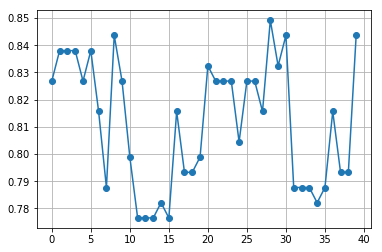

In [36]:
grafico_y = []
grafico_x = []
grafico_label_x = []
maior = ["", "", "", -1.0]
ite = 0
X = train.drop(['PassengerId'], axis = 1)
y = full_data['Survived']
tamTrain = int(len(X)*0.8)
for p1 in ['entropy', 'gini']:
    for p2 in ['best', 'random']:
        for p3 in [None, 'auto', 'sqrt', 'log2', 1, 2, 3, 4, 5, 6]:
            model_test = tree.DecisionTreeClassifier(criterion=p1, splitter=p2, max_features=p3, random_state = 1)
            model_test.fit(X[:tamTrain], y[:tamTrain])
            pred_test = model_test.predict(X[tamTrain:])
            accu = accuracy_score(pred_test, y[tamTrain:])
            grafico_y.append(accu)
            grafico_x.append(ite)
            grafico_label_x.append((p1, p2, p3))            
            if(maior[3] < accu): maior = [p1, p2, p3, accu]
            ite = ite + 1
            print p1, p2, p3, accu

print "Melhor: ", maior
#print grafico_label_x            
plt.plot(grafico_x, grafico_y, marker='o')
plt.grid()